In [12]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import os
import sys
sys.path.append(os.path.dirname(os.getcwd())) # Insert all modules from the folder above
print(os.path.dirname(os.getcwd())) # Insert all modules from the folder above)
from tops.config import LazyConfig, instantiate


c:\Users\sebsk\Documents\Git\TDT4265_StarterCode\assignment4\SSD


In [13]:
def plot_bbox(ax, box, color, centers=True, circle=True):
    cx, cy, w, h = box
    cx *= cfg.train.imshape[1]
    cy *= cfg.train.imshape[0]
    w *= cfg.train.imshape[1]
    h *= cfg.train.imshape[0]
    x1, y1 = cx + w/2, cy + h/2
    x0, y0 = cx - w/2, cy - h/2
    
    if circle:
        ax.add_artist(matplotlib.patches.Ellipse([cx, cy], w,h, alpha=0.1, color=color))
        # plt.plot(cx, cy, f"o{'0'}")
    else:
        plt.plot([x0, x0, x1, x1, x0],[y0, y1, y1, y0, y0], f"{color}", alpha=.5)

    if centers:
        # ax.add_artist(matplotlib.patches.Ellipse([cx, cy], w,h, alpha=0, color=color))
        plt.plot(cx, cy, f"x{'k'}")

def get_num_boxes_in_fmap(idx):
    boxes_per_location = 2 + 2*len(cfg.anchors.aspect_ratios[idx])
    feature_map_size = cfg.anchors.feature_sizes[idx]
    return int(boxes_per_location * np.prod(feature_map_size))

In [14]:
cfg = LazyConfig.load("../configs/ssd300.py")
anchors = instantiate(cfg.anchors)(order="xywh")
print("Number of anchors:", len(anchors))

PLOT_CIRCLE = True
fmap_idx_to_visualize = 3
print("Aspect used for feature map:", cfg.anchors.aspect_ratios[fmap_idx_to_visualize])
# Set which aspect ratio indices we want to visualize
aspect_ratio_indices = [0,1,2,3]

offset = sum([get_num_boxes_in_fmap(prev_layer) for prev_layer in range(fmap_idx_to_visualize)])
print ("offset:", offset)
print ("range:", len(anchors)-offset)

Saving SSD outputs to: outputs/
Number of anchors: 8732
Aspect used for feature map: [2, 3]
offset: 8542
range: 190


In [15]:

def anchor_box_size(idx):
    N = get_num_boxes_in_fmap(idx)
    aspect_ratio = np.array(cfg.anchors.aspect_ratios[fmap_idx_to_visualize])
    print(aspect_ratio)
    min_size = np.array(cfg.anchors.min_sizes[idx])
    next_min_size = np.array(cfg.anchors.min_sizes[idx+1])
    bbox_size = np.array([
                [np.sqrt(aspect_ratio), 1/np.sqrt(aspect_ratio)], 
                [1/np.sqrt(aspect_ratio), np.sqrt(aspect_ratio)]])

    return min_size*bbox_size

anchor_box_size(3)

[2 3]


array([[[229.1025971 , 280.59223083],
        [114.55129855,  93.53074361]],

       [[114.55129855,  93.53074361],
        [229.1025971 , 280.59223083]]])

6
25.0
25.0
tensor([0.5400, 0.5400])
tensor([0.5400, 0.5400])
tensor([0.5400, 0.5400])
tensor([0.5400, 0.5400])
tensor([0.5400, 0.5400])
tensor([0.5400, 0.5400])
tensor([0.5400, 0.5400])
tensor([0.5400, 0.5400])
tensor([0.5400, 0.5400])
tensor([0.5400, 0.5400])
tensor([0.5400, 0.5400])
tensor([0.5400, 0.5400])
tensor([0.5400, 0.5400])
tensor([0.5400, 0.5400])
tensor([0.5400, 0.5400])
tensor([0.5400, 0.5400])
tensor([0.6192, 0.6192])
tensor([0.6192, 0.6192])
tensor([0.6192, 0.6192])
tensor([0.6192, 0.6192])
tensor([0.6192, 0.6192])
tensor([0.6192, 0.6192])
tensor([0.6192, 0.6192])
tensor([0.6192, 0.6192])
tensor([0.6192, 0.6192])
tensor([0.6192, 0.6192])
tensor([0.6192, 0.6192])
tensor([0.6192, 0.6192])
tensor([0.6192, 0.6192])
tensor([0.6192, 0.6192])
tensor([0.6192, 0.6192])
tensor([0.6192, 0.6192])
tensor([0.7637, 0.3818])
tensor([0.7637, 0.3818])
tensor([0.7637, 0.3818])
tensor([0.7637, 0.3818])
tensor([0.7637, 0.3818])
tensor([0.7637, 0.3818])
tensor([0.7637, 0.3818])
tensor([0.763

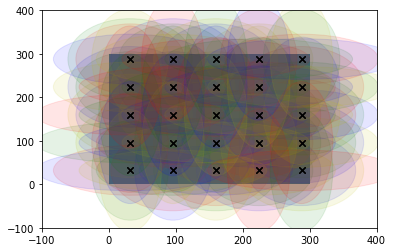

In [16]:
fig, ax = plt.subplots()
# Set up our scene
plt.ylim([-100, cfg.train.imshape[0]+100])
plt.xlim([-100, cfg.train.imshape[1]+100])


boxes_per_location = 2 + 2*len(cfg.anchors.aspect_ratios[fmap_idx_to_visualize])
print(boxes_per_location)
indices_to_visualize = []
colors = []
available_colors = ["r", "g", "b", "y", "m", "b","w"]
print(get_num_boxes_in_fmap(fmap_idx_to_visualize)/boxes_per_location)
for idx in range(offset, offset + get_num_boxes_in_fmap(fmap_idx_to_visualize)):
    for aspect_ratio_idx in aspect_ratio_indices:
        if idx % boxes_per_location == aspect_ratio_idx:
            indices_to_visualize.append(idx)
            colors.append(available_colors[aspect_ratio_idx])

print(len(indices_to_visualize)/len(aspect_ratio_indices))
ax.add_artist(plt.Rectangle([0, 0], cfg.train.imshape[1], cfg.train.imshape[0]))
unique_centers = []
centers = []
whs = []
for i, idx in enumerate(indices_to_visualize):
    prior = anchors[idx]

    # if (i % boxes_per_location) == 0:
    pos = prior[:2]
    wh = prior[2:]

    print(wh)
    whs.append(wh.numpy())
    centers.append(pos.numpy())

    # if pos not in unique_centers:
    #     print(prior)
    #     unique_centers.append(prior[:2])
    color = colors[i]
    plot_bbox(ax, prior, color, circle=PLOT_CIRCLE)
plt.savefig("4d_prior_circles.svg")
plt.show()

# print(unique_centers)

In [17]:
def get_unique_centers(priors):
    # N = int(fmap_idx_to_visualize)/boxes_per_location
    N = int(len(indices_to_visualize)/len(aspect_ratio_indices))
    # print(N)
    unique_centers = []
    for i in range(int(N)):
        # print(i)
        unique_centers.append(priors[i][:2])
    return np.array(unique_centers)

# print(priors)


print(get_unique_centers(centers))


[[160.00002  32.     ]
 [224.       32.     ]
 [288.       32.     ]
 [ 32.       96.     ]
 [224.       96.     ]
 [288.       96.     ]
 [ 32.      160.00002]
 [ 96.      160.00002]
 [288.      160.00002]
 [ 32.      224.     ]
 [ 96.      224.     ]
 [160.00002 224.     ]
 [ 32.      288.     ]
 [ 96.      288.     ]
 [160.00002 288.     ]
 [224.      288.     ]
 [ 96.       32.     ]
 [160.00002  32.     ]
 [224.       32.     ]
 [288.       32.     ]
 [160.00002  96.     ]
 [224.       96.     ]
 [288.       96.     ]
 [ 32.      160.00002]
 [224.      160.00002]]


In [18]:
print(np.unique(np.array(whs), axis=0))

[[ 93.53075 280.59222]
 [114.5513  229.1026 ]
 [162.      162.     ]
 [185.7579  185.7579 ]
 [229.1026  114.5513 ]
 [280.59222  93.53075]]
